<a href="https://colab.research.google.com/github/mar-esther23/EOBM_2024_viz/blob/main/LIBB_3Change_Feedback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Systems Biology
## 3. The magic of change and how to find it

Exercises for the chapter.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Saturated feedback (Michaelis-Menten)

Differential equation:
$\frac{dx}{dt} = -k_{neg}x + \dfrac{c\cdot x}{x+1/k_{pos}}$

Steady state:
$x=0$ and $x=\frac{c\cdot k_{pos}-k_{neg}}{k_{pos}k_{neg}}$

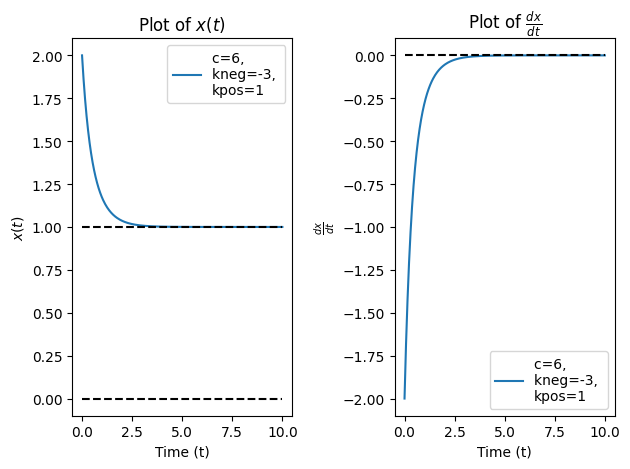

In [2]:
# Parameters
kneg = 3  # negative feedback
kpos = 1  # positive feedback
c = 6 # Vmax
x0 = 2 # initial condition
t = np.linspace(0, 10, 400) # time

# Differential equation model accepting parameter k
def d_feedback(x, t, c, kneg, kpos):
    return -kneg*x + c*x/(x+1/kpos)

# Steady states
xeq = [0, (c*kpos-kneg)/(kpos*kneg)]

# Solve ODE and get x(t)
x_t = odeint(d_feedback, x0, t, args=(c,kneg,kpos))

# Calculate dx/dt
dx_dt = -kneg*x_t + c*x_t/(x_t+1/kpos)


# Creating subplots
fig, axs = plt.subplots(1,2)

# Plot x(t) and dx/dt in separate subplots
for ax, y, yeq, title in zip(axs, [x_t, dx_dt], [xeq, 0],
                             [r"$x(t)$", r"$\frac{dx}{dt}$"]):
    ax.plot(t, y, label=f"c={c}, \nkneg=-{kneg}, \nkpos={round(kpos,3)}")
    ax.hlines(yeq, t.min(), t.max(), color='black', linestyle='dashed')
    ax.set_xlabel('Time (t)')
    ax.set_ylabel(title)
    ax.set_title(f"Plot of {title}")
    ax.legend()

plt.tight_layout()
plt.show()

<ipython-input-5-048c7f98d868>:16: RuntimeWarning: divide by zero encountered in scalar divide
  xeq = [0, (c*kpos-kneg)/(kpos*kneg)]


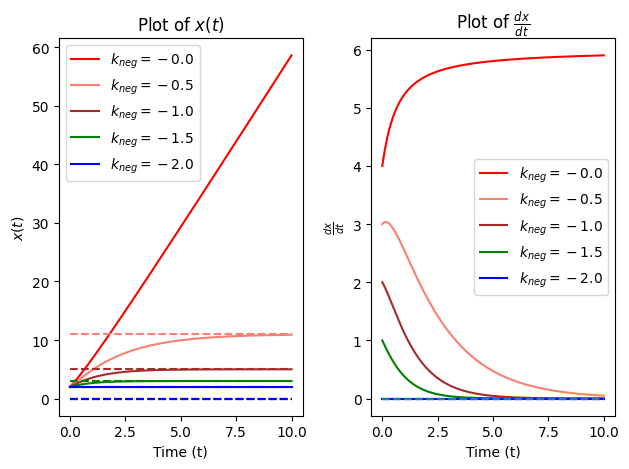

In [5]:
# Parameters
kneg = 3  # negative feedback
kpos = 1  # positive feedback
c = 6 # Vmax
x0 = 2 # initial condition

kneg_list = np.linspace(0, 2, 5)  # negative feedback
colors = ['r','salmon','brown','g','b']

# Creating subplots
fig, axs = plt.subplots(1,2)

# Plot x(t) and dx/dt in separate subplots
for kneg, color in zip(kneg_list, colors):
    # Solve ODE and get x(t)
    x_t = odeint(d_feedback, x0, t, args=(c,kneg,kpos))
    # Calculate dx/dt
    dx_dt = -kneg*x_t + c*x_t/(x_t+1/kpos)
    # Plot x_t and steady
    axs[0].plot(t, x_t, label=r"$k_{neg}=-$"+str(kneg), color=color)
    xeq = [0, (c*kpos-kneg)/(kpos*kneg)]
    axs[0].hlines(xeq, t.min(), t.max(), linestyle='dashed', color=color)
    # Plot dxdt and steady state
    axs[1].plot(t, dx_dt, label=r"$k_{neg}=-$"+str(kneg), color=color)
    axs[1].hlines(0, t.min(), t.max(), linestyle='dashed')

# Plot title and labels
for ax, title in zip(axs, [r"$x(t)$", r"$\frac{dx}{dt}$"]):
    ax.set_xlabel('Time (t)')
    ax.set_ylabel(title)
    ax.set_title(f"Plot of {title}")
    ax.legend()

plt.tight_layout()
plt.show()

<ipython-input-2-bf58a66c0169>:10: RuntimeWarning: divide by zero encountered in scalar divide
  return -kneg*x + c*x/(x+1/kpos)
<ipython-input-6-30aba5a6a9a5>:13: RuntimeWarning: divide by zero encountered in scalar divide
  dx_dt = -kneg*x_t + c*x_t/(x_t+1/kpos)
<ipython-input-6-30aba5a6a9a5>:16: RuntimeWarning: divide by zero encountered in scalar divide
  xeq = [0, (c*kpos-kneg)/(kpos*kneg)]


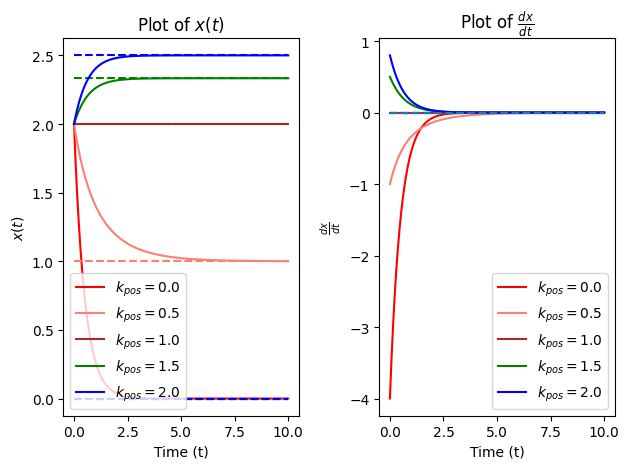

In [6]:
# Parameters
kneg = 3  # negative feedback
kpos = 1  # positive feedback
c = 6 # Vmax
x0 = 2 # initial condition
kpos_list = np.linspace(0, 2, 5)  # negative feedback
colors = ['r','salmon','brown','g','b']

# Creating subplots
fig, axs = plt.subplots(1,2)

# Plot x(t) and dx/dt in separate subplots
for kpos, color in zip(kpos_list, colors):
    # Solve ODE and get x(t)
    x_t = odeint(d_feedback, x0, t, args=(c,kneg,kpos))
    # Calculate dx/dt
    dx_dt = -kneg*x_t + c*x_t/(x_t+1/kpos)
    # Plot x_t and steady
    axs[0].plot(t, x_t, label=r"$k_{pos}=$"+str(kpos), color=color)
    xeq = [0, (c*kpos-kneg)/(kpos*kneg)]
    axs[0].hlines(xeq, t.min(), t.max(), linestyle='dashed', color=color)
    # Plot dxdt and steady state
    axs[1].plot(t, dx_dt, label=r"$k_{pos}=$"+str(kpos), color=color)
    axs[1].hlines(0, t.min(), t.max(), linestyle='dashed')

# Plot title and labels
for ax, title in zip(axs, [r"$x(t)$", r"$\frac{dx}{dt}$"]):
    ax.set_xlabel('Time (t)')
    ax.set_ylabel(title)
    ax.set_title(f"Plot of {title}")
    ax.legend()

plt.tight_layout()
plt.show()

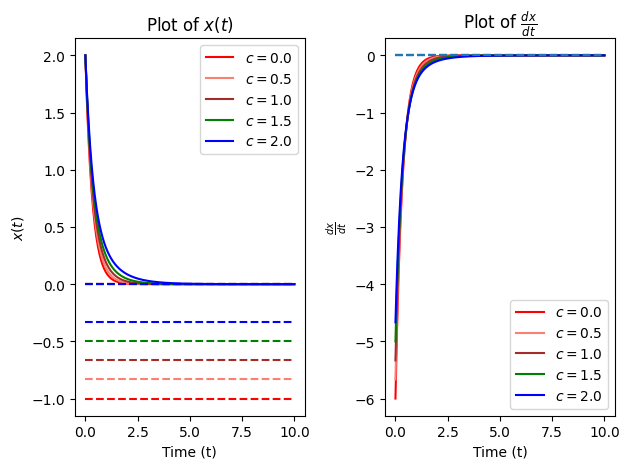

In [8]:
# Parameters
kneg = 3  # negative feedback
kpos = 1  # positive feedback
c = 6 # Vmax
x0 = 2 # initial condition
c_list = np.linspace(0, 2, 5)  # negative feedback
colors = ['r','salmon','brown','g','b']

# Creating subplots
fig, axs = plt.subplots(1,2)

# Plot x(t) and dx/dt in separate subplots
for c, color in zip(c_list, colors):
    # Solve ODE and get x(t)
    x_t = odeint(d_feedback, x0, t, args=(c,kneg,kpos))
    # Calculate dx/dt
    dx_dt = -kneg*x_t + c*x_t/(x_t+1/kpos)
    # Calculate steady state
    xeq = [0, (c*kpos-kneg)/(kpos*kneg)]
    # Plot x_t and steady
    axs[0].plot(t, x_t, label=r"$c=$"+str(c), color=color)
    axs[0].hlines(xeq, t.min(), t.max(), linestyle='dashed', color=color)
    # Plot dxdt and steady state
    axs[1].plot(t, dx_dt, label=r"$c=$"+str(c), color=color)
    axs[1].hlines(0, t.min(), t.max(), linestyle='dashed')

# Plot title and labels
for ax, title in zip(axs, [r"$x(t)$", r"$\frac{dx}{dt}$"]):
    ax.set_xlabel('Time (t)')
    ax.set_ylabel(title)
    ax.set_title(f"Plot of {title}")
    ax.legend()

plt.tight_layout()
plt.show()

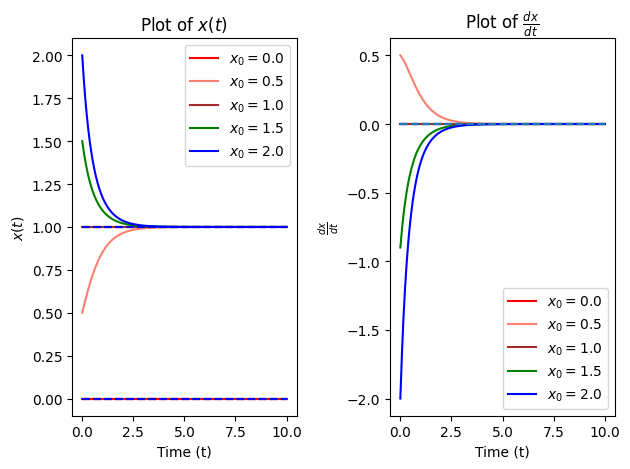

In [9]:
# Parameters
kneg = 3  # negative feedback
kpos = 1  # positive feedback
c = 6 # Vmax
x0 = 2 # initial condition
x0_list = np.linspace(0, 2, 5)  # negative feedback
colors = ['r','salmon','brown','g','b']

# Creating subplots
fig, axs = plt.subplots(1,2)

# Plot x(t) and dx/dt in separate subplots
for x0, color in zip(x0_list, colors):
    # Solve ODE and get x(t)
    x_t = odeint(d_feedback, x0, t, args=(c,kneg,kpos))
    # Calculate dx/dt
    dx_dt = -kneg*x_t + c*x_t/(x_t+1/kpos)
    # Calculate steady state
    xeq = [0, (c*kpos-kneg)/(kpos*kneg)]
    # Plot x_t and steady
    axs[0].plot(t, x_t, label=r"$x_0=$"+str(x0), color=color)
    axs[0].hlines(xeq, t.min(), t.max(), linestyle='dashed', color=color)
    # Plot dxdt and steady state
    axs[1].plot(t, dx_dt, label=r"$x_0=$"+str(x0), color=color)
    axs[1].hlines(0, t.min(), t.max(), linestyle='dashed')

# Plot title and labels
for ax, title in zip(axs, [r"$x(t)$", r"$\frac{dx}{dt}$"]):
    ax.set_xlabel('Time (t)')
    ax.set_ylabel(title)
    ax.set_title(f"Plot of {title}")
    ax.legend()

plt.tight_layout()
plt.show()